In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
folder = r"/Users/qialiang/Documents/Studium/DM_Dataset"
file1 = "Physics_Comments.csv"
path1 = os.path.join(folder, file1)
comments_df = pd.read_csv(path1)

file2 = "Merged_posts_to_users.csv" 
path2 = os.path.join(folder, file2)
posts_users_df = pd.read_csv(path2)

/var/folders/mg/7s9vdy_90bz_8g1dvhh46rzr0000gn/T/ipykernel_52907/3504081062.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv(path1)


In [5]:
posts_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782271 entries, 0 to 782270
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id_post                555999 non-null  float64
 1   PostTypeId             555999 non-null  float64
 2   AcceptedAnswerId       555999 non-null  float64
 3   CreationDate_post      555999 non-null  object 
 4   Score                  555999 non-null  float64
 5   ViewCount              555999 non-null  float64
 6   Body                   555999 non-null  object 
 7   OwnerUserId            555999 non-null  float64
 8   LastEditorUserId       276769 non-null  float64
 9   LastEditDate           281349 non-null  object 
 10  LastActivityDate       555999 non-null  object 
 11  Title                  225083 non-null  object 
 12  Tags                   225083 non-null  object 
 13  AnswerCount            555999 non-null  float64
 14  CommentCount           555999 non-nu

In [11]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135281 entries, 0 to 1135280
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1135281 non-null  object 
 1   PostId           1135280 non-null  object 
 2   Score            1135279 non-null  float64
 3   Text             1135279 non-null  object 
 4   CreationDate     1135278 non-null  object 
 5   UserId           1085682 non-null  float64
 6   UserDisplayName  49643 non-null    object 
dtypes: float64(2), object(5)
memory usage: 60.6+ MB


                    User Count  Percentage (%)
active_days_bucket                            
0 天                     110764           14.16
1–5 天                    19564            2.50
6–30 天                   26752            3.42
31–180 天                 50196            6.42
181–365 天                30966            3.96
>365 天                  544029           69.54


/opt/miniconda3/envs/Datamining/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/Datamining/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/Datamining/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/Datamining/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/Datamining/lib/python3.10/site-packages/IPython/core/pylabtools.py:170:

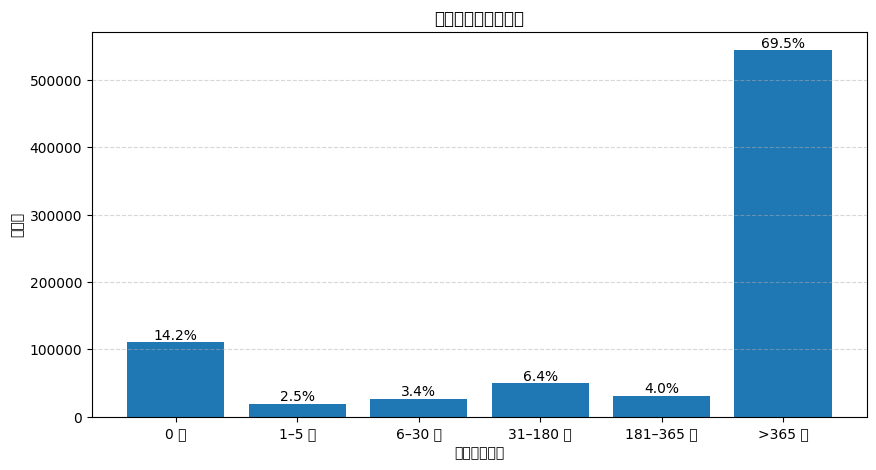

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 转换为 datetime
posts_users_df['CreationDate_user'] = pd.to_datetime(posts_users_df['CreationDate_user'], errors='coerce')
posts_users_df['LastAccessDate'] = pd.to_datetime(posts_users_df['LastAccessDate'], errors='coerce')

# 2. 计算活跃天数
posts_users_df['active_days'] = (posts_users_df['LastAccessDate'] - posts_users_df['CreationDate_user']).dt.days

# 3. 丢弃非法值
valid_df = posts_users_df[posts_users_df['active_days'].notna() & (posts_users_df['active_days'] >= 0)]

# 4. 设置分箱
bins = [-1, 0, 5, 30, 180, 365, float('inf')]
labels = ['0 天', '1–5 天', '6–30 天', '31–180 天', '181–365 天', '>365 天']

# 5. 分类
valid_df['active_days_bucket'] = pd.cut(valid_df['active_days'], bins=bins, labels=labels, right=True)

# 6. 统计数量和百分比
bucket_counts = valid_df['active_days_bucket'].value_counts().sort_index()
bucket_percent = (bucket_counts / bucket_counts.sum() * 100).round(2)

# 7. 合并成 DataFrame
distribution_df = pd.DataFrame({
    'User Count': bucket_counts,
    'Percentage (%)': bucket_percent
})

# 8. 打印表格
print(distribution_df)

# 9. 可视化（带百分比）
plt.figure(figsize=(10, 5))
bars = plt.bar(distribution_df.index, distribution_df['User Count'])
plt.title('用户按活跃天数分布')
plt.xlabel('活跃天数区间')
plt.ylabel('用户数')

# 添加百分比标注
for bar, pct in zip(bars, bucket_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
# 1. 确保 CreationDate_post 是 datetime 类型
posts_users_df['CreationDate_post'] = pd.to_datetime(posts_users_df['CreationDate_post'], errors='coerce')

# 2. 去掉没有 OwnerUserId 的行（匿名帖子）
filtered_df = posts_users_df[posts_users_df['OwnerUserId'].notna()]

# 3. 按用户聚合，找出最后一次发帖时间
last_post_df = (
    filtered_df
    .groupby('OwnerUserId')['CreationDate_post']
    .max()
    .reset_index()
    .rename(columns={'CreationDate_post': 'LastPostDate'})
)

# 4. 查看结果
print(last_post_df.head())

   OwnerUserId            LastPostDate
0         -1.0 2022-06-21 22:21:29.697
1          4.0 2013-12-10 22:56:01.103
2          6.0 2010-11-04 04:57:45.843
3          7.0 2013-02-02 01:28:06.660
4          8.0 2014-02-02 03:31:23.190


In [12]:
import pandas as pd

# 确保 CreationDate 是 datetime 类型
comments_df['CreationDate'] = pd.to_datetime(comments_df['CreationDate'], errors='coerce')

# 去掉没有 UserId 的匿名评论
filtered_comments_df = comments_df[comments_df['UserId'].notna()]

# 按用户分组，找出最后评论时间
last_comment_df = (
    filtered_comments_df
    .groupby('UserId')['CreationDate']
    .max()
    .reset_index()
    .rename(columns={'CreationDate': 'LastCommentDate'})
)

# 可选：统一时间格式（去掉毫秒）
last_comment_df['LastCommentDate'] = last_comment_df['LastCommentDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# 查看前几行
print(last_comment_df.head())

   UserId      LastCommentDate
0    -1.0  2024-03-31 20:46:37
1     4.0  2018-08-12 22:08:45
2     7.0  2010-11-03 16:31:09
3     8.0  2012-06-24 22:15:36
4    11.0  2020-06-06 02:20:00


In [ ]:
# 1. 合并 last_post_df 和 last_comment_df（如之前做的）
last_post_df = last_post_df.rename(columns={'OwnerUserId': 'UserId'})
merged_df = pd.merge(last_post_df, last_comment_df, on='UserId', how='outer')

# 2. 为了方便合并回 posts_users_df，恢复 UserId → OwnerUserId
merged_df = merged_df.rename(columns={'UserId': 'OwnerUserId'})

# 3. 合并回原始的 posts_users_df
posts_users_with_activity = pd.merge(
    posts_users_df,
    merged_df,
    on='OwnerUserId',
    how='left'  # 保留所有原始发帖记录
)

In [26]:
# 强制转换为 pandas datetime（即使它已经看起来像 datetime）
posts_users_with_activity['CreationDate_user'] = pd.to_datetime(
    posts_users_with_activity['CreationDate_user'], errors='coerce'
)
posts_users_with_activity['LastActivityDate'] = pd.to_datetime(
    posts_users_with_activity['LastActivityDate'], errors='coerce'
)

# 然后再计算时间差
posts_users_with_activity['RealActiveDays'] = (
    posts_users_with_activity['LastActivityDate'] - posts_users_with_activity['CreationDate_user']
).dt.days

posts_users_with_activity = posts_users_with_activity[
    (posts_users_with_activity['OwnerUserId'] != -1) &
    (posts_users_with_activity['OwnerUserId'].notna())
]

In [27]:
print(posts_users_with_activity[['OwnerUserId', 'CreationDate_user', 'LastActivityDate', 'RealActiveDays']].head())

    OwnerUserId       CreationDate_user        LastActivityDate  \
27          4.0 2010-11-01 23:01:40.147 2016-01-24 08:19:31.100   
28          4.0 2010-11-01 23:01:40.147 2018-10-07 08:31:45.650   
29          4.0 2010-11-01 23:01:40.147 2021-06-05 10:21:33.433   
30          4.0 2010-11-01 23:01:40.147 2015-11-11 16:45:03.857   
31          4.0 2010-11-01 23:01:40.147 2016-03-10 14:20:47.257   

    RealActiveDays  
27          1909.0  
28          2896.0  
29          3868.0  
30          1835.0  
31          1955.0  


In [28]:
filename = "posts_to_users_with_lastdate.csv"
output_path = f"{folder}\\{filename}"

posts_users_with_activity.to_csv(output_path, index=False, encoding='utf-8-sig')